In [24]:
import pandas as pd

In [25]:
# Featureset einlesen

merged_file = 'files/out/merged_featureset_nonan.csv'

merged_featureset = pd.read_csv(merged_file)
merged_featureset

,Stadtteil,Mietpreis pro qm,Gruenflaeche,AQI,Fahrradhausanzahl,Flaeche,Anzahl_Punkte
0,Allermöhe,9.672555,64.5282,2.211251,0.0,8.645889,0.0
1,Alsterdorf,11.178675,43.2205,2.166802,0.0,3.152301,4698.0
2,Altengamme,9.473979,1.2187,2.211251,0.0,15.605402,1639.0
3,Altona-Altstadt,10.720247,30.2225,2.166802,9.0,2.716112,4796.0
4,Altona-Nord,11.504443,8.2602,2.166802,45.0,2.216385,2513.0
...,...,...,...,...,...,...,...
99,Wilhelmsburg,9.148069,324.3952,2.179303,1.0,35.362578,15997.0
100,Wilstorf,8.881711,87.5879,2.179303,0.0,3.420297,3086.0
101,Winterhude,11.285769,188.8974,2.166802,14.0,7.581131,9063.0
102,Wohldorf-Ohlstedt,11.865784,22.3676,2.192803,0.0,17.277651,3560.0


In [33]:
# wir fügen eine Spalte mit 'Gruenflaeche_ratio' hinzu, welche den Anteil der Grünfläche an der Gesamtfläche des Stadtteils anzeigt

merged_featureset['Gruenflaeche'] = merged_featureset['Gruenflaeche'] * 0.01
merged_featureset['Gruenflaeche_ratio'] = merged_featureset['Gruenflaeche'] / merged_featureset['Flaeche']

# Zeile mit Neuwerk löschen weil Outlier
merged_featureset = merged_featureset[merged_featureset['Stadtteil'] != 'Neuwerk']

merged_featureset

,Stadtteil,Mietpreis pro qm,Gruenflaeche,AQI,Fahrradhausanzahl,Flaeche,Anzahl_Punkte,Gruenflaeche_ratio,Cluster
0,Allermöhe,9.672555,6.452820e-07,2.211251,0.0,8.645889,0.0,7.463454e-08,1
1,Alsterdorf,11.178675,4.322050e-07,2.166802,0.0,3.152301,4698.0,1.371078e-07,1
2,Altengamme,9.473979,1.218700e-08,2.211251,0.0,15.605402,1639.0,7.809475e-10,1
3,Altona-Altstadt,10.720247,3.022250e-07,2.166802,9.0,2.716112,4796.0,1.112712e-07,1
4,Altona-Nord,11.504443,8.260200e-08,2.166802,45.0,2.216385,2513.0,3.726880e-08,1
...,...,...,...,...,...,...,...,...,...
98,Wellingsbüttel,11.774720,3.730630e-07,2.166802,0.0,4.083628,0.0,9.135577e-08,1
99,Wilhelmsburg,9.148069,3.243952e-06,2.179303,1.0,35.362578,15997.0,9.173404e-08,0
100,Wilstorf,8.881711,8.758790e-07,2.179303,0.0,3.420297,3086.0,2.560827e-07,1
101,Winterhude,11.285769,1.888974e-06,2.166802,14.0,7.581131,9063.0,2.491678e-07,0


In [34]:
# Aufteilen der Daten in Features (X) und Zielvariable (y)
X = merged_featureset.drop('Stadtteil', axis=1)
y = merged_featureset['Stadtteil']

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you may need to adjust this)
num_clusters = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
merged_featureset['Cluster'] = y_kmeans

# Display the cluster assignments for each Stadtteil
# print(merged_featureset[['Stadtteil', 'Cluster']])
merged_featureset[['Stadtteil', 'Cluster']]

C:\Users\lukas\AppData\Local\Temp\ipykernel_30432\729335366.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_featureset['Cluster'] = y_kmeans


,Stadtteil,Cluster
0,Allermöhe,0
1,Alsterdorf,2
2,Altengamme,0
3,Altona-Altstadt,2
4,Altona-Nord,2
...,...,...
98,Wellingsbüttel,2
99,Wilhelmsburg,1
100,Wilstorf,0
101,Winterhude,1


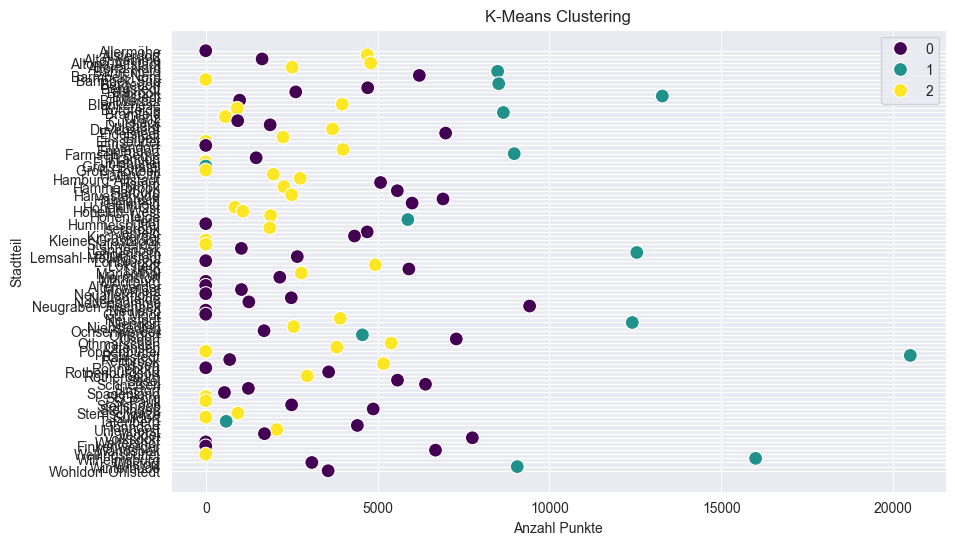

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anzahl_Punkte', y='Stadtteil', hue='Cluster', data=merged_featureset, palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Anzahl Punkte')
plt.ylabel('Stadtteil')
plt.legend()
plt.show()

<Axes: >

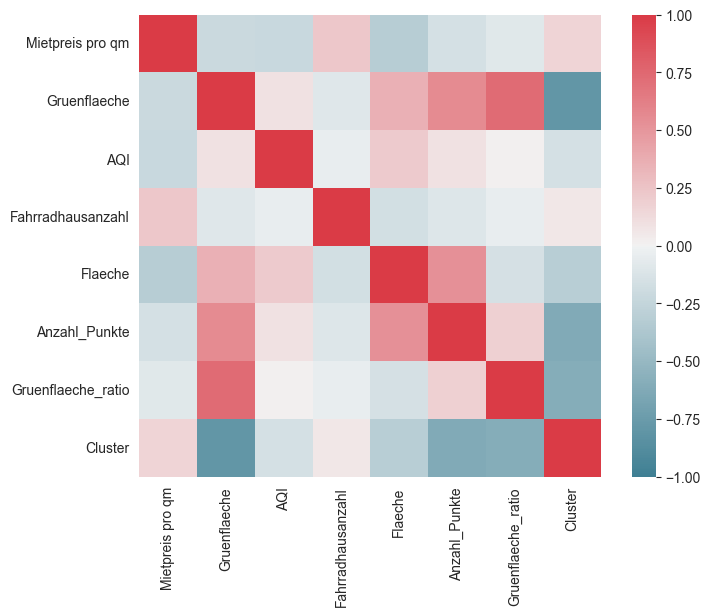

In [42]:


f, ax = plt.subplots(figsize=(8, 6))
corr = X.corr(method='pearson')
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)